# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
data["plot"] = True

data['min_llema_angle'] = 0

data['pl_move_trail_trigger']       = 0.0040
data['stop_loss_pip']               = -0.0020

data['take_profit_method']  = 'simple'
data['stop_loss_method']    = 'simple'

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

100%|██████████████████████████████▉| 1872837/1879307 [27:11<00:33, 191.70it/s]

pls    0.00506
dtype: float64
--------------------------------------
                  date ord_types  llema_angle               close_type  \
56 2021-03-26 14:22:32     short         -2.0  simple_slema_move_close   
57 2021-03-26 19:12:45     short         -1.0               sema_close   
58 2021-03-28 23:09:05      long          1.0               sema_close   
59 2021-03-29 03:16:51     short         -0.0  simple_slema_move_close   
60 2021-03-29 08:15:36      long          1.0               sema_close   
61 2021-03-29 09:55:52     short         -1.0  simple_slema_move_close   
62 2021-03-29 13:51:30      long          0.0  simple_slema_move_close   
63 2021-03-29 14:37:13     short         -1.0               sema_close   
64 2021-03-29 14:50:32      long          1.0               sema_close   
65 2021-03-29 17:07:02     short         -1.0  simple_slema_move_close   
66 2021-03-30 00:19:52     short         -1.0  simple_slema_move_close   
67 2021-03-30 23:37:04     short         -4

100%|██████████████████████████████| 1879307/1879307 [27:11<00:00, 1151.85it/s]

Wall time: 39min 15s


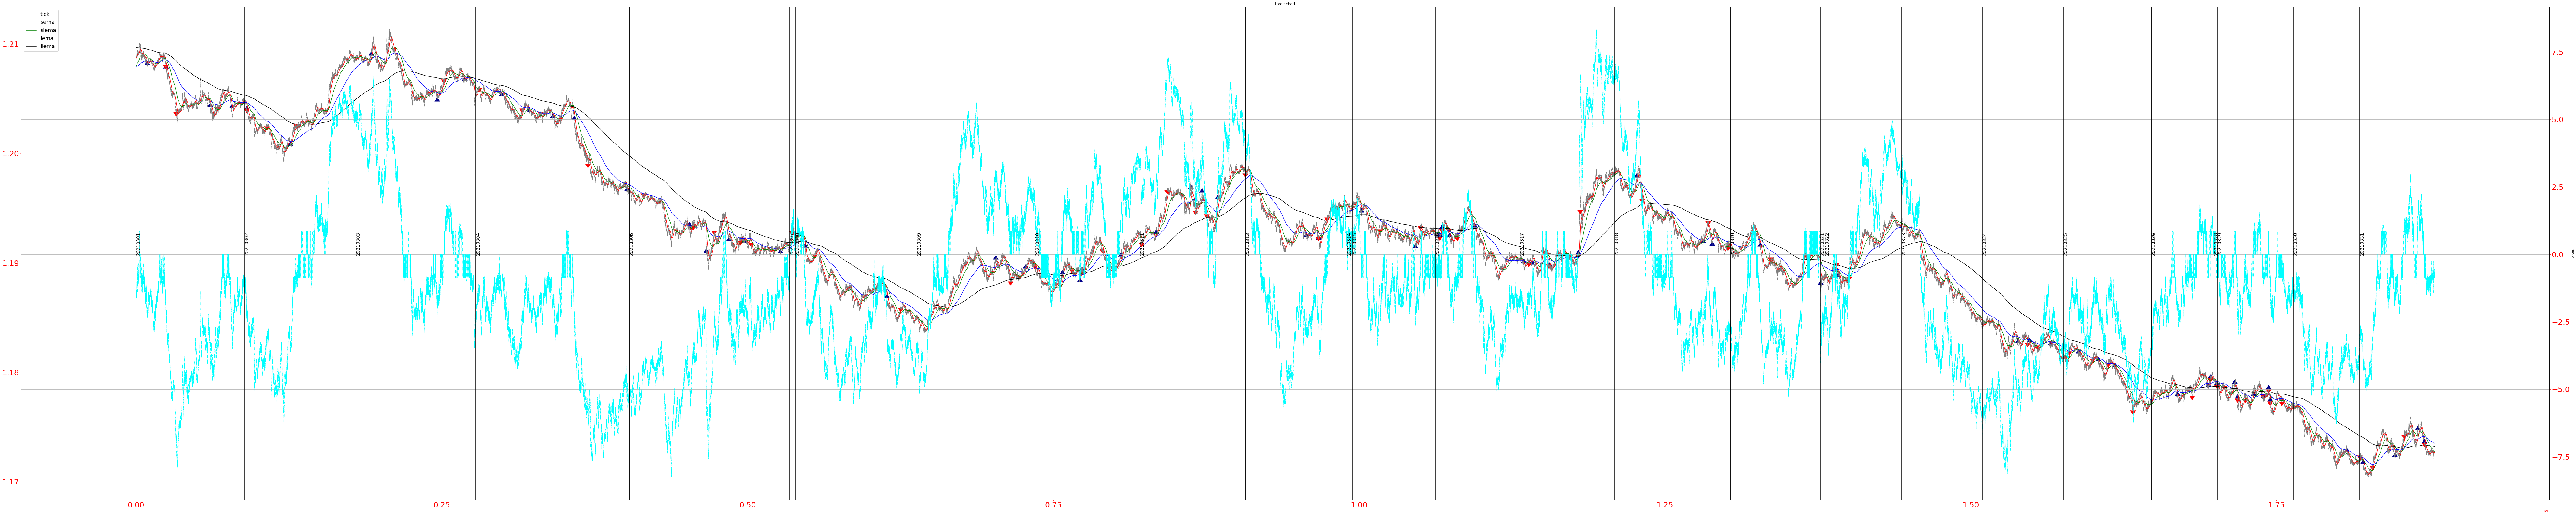

-----------------------------------------------------
date_val          : ['20210301', '20210302', '20210303', '20210304', '20210305', '20210306', '20210307', '20210308', '20210309', '20210310', '20210311', '20210312', '20210313', '20210314', '20210315', '20210316', '20210317', '20210318', '20210319', '20210320', '20210321', '20210322', '20210323', '20210324', '20210325', '20210326', '20210327', '20210328', '20210329', '20210330', '20210331']
Total PL : 0.00505999999999999
-------------
net_pl            : 0.00506/0.07478
-------------
+ve               : num= 49    sum= +0.03992    avg= +0.00081
-ve               : num= 22    sum= -0.03486    avg= -0.00158
-----------------------------------------------------
month_val
3    0.00506
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    44
simple_stop                13
sema_close                  9
simple_take_profit          5
Name: close_type, dtype: int64
--------------------------

In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')